In [2]:
# Load required library for project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from datetime import datetime
import sqlite3
from sklearn.utils import resample


In [3]:
# Read sqlite query results into a pandas DataFrame
df = pd.read_csv('ML_US_Wildfire.csv')

In [4]:
df.head()

,FIRE_SIZE,LATITUDE,LONGITUDE,NWCG_GENERAL_CAUSE,STATE,day,month,prcp,pres,tavg,tmax,tmin,wspd
0,0.1,44.043333,-121.386111,Recreation and ceremony,OR,5,3,0.0,1025.9,5.8,16.7,-3.3,8.2
1,3.0,35.900000,-81.683333,Debris and open burning,NC,9,5,0.0,1014.7,18.9,27.8,9.4,6.1
2,0.1,44.410000,-121.315556,Debris and open burning,OR,2,3,0.0,1016.4,5.0,12.2,-2.2,7.6
3,0.1,44.012778,-103.382500,Recreation and ceremony,SD,2,1,0.0,1029.5,-12.8,-8.3,-17.8,8.6
4,0.1,38.700278,-119.840556,Debris and open burning,CA,6,5,0.0,1011.6,4.1,7.2,1.1,15.1


min        0.000200
max       99.900000
median     0.720000
mean       3.957436
Name: FIRE_SIZE, dtype: float64


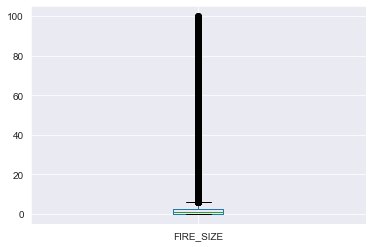

In [5]:
#### clear outlier
df.boxplot(column=['FIRE_SIZE'])
Q1 = df['FIRE_SIZE'].quantile(0.25)
Q3 = df['FIRE_SIZE'].quantile(0.75)
print(df['FIRE_SIZE'].agg(['min', 'max', np.median,'mean']))
IQR = Q3 - Q1
filter = (df['FIRE_SIZE'] >= Q1 - 1.5 * IQR) & (df['FIRE_SIZE'] <= Q3 + 1.5 *IQR)
df1=df.loc[filter]

In [6]:
df_new = df
df_new.shape

(321577, 13)

## 8.  Downsampling and Upsampling

In [7]:
Arson = df_new[df_new["NWCG_GENERAL_CAUSE"] == "Arson/incendiarism"]
Debris  = df_new[df_new["NWCG_GENERAL_CAUSE"] == "Debris and open burning"]
Equipment = df_new[df_new["NWCG_GENERAL_CAUSE"] == "Equipment and vehicle use"]
Firearms = df_new[df_new["NWCG_GENERAL_CAUSE"] == "Firearms and explosives use"]
Fireworks = df_new[df_new["NWCG_GENERAL_CAUSE"] == "Fireworks"]
Misuse = df_new[df_new["NWCG_GENERAL_CAUSE"] == "Misuse of fire by a minor"]
Natural = df_new[df_new["NWCG_GENERAL_CAUSE"] == "Natural"]
Power = df_new[df_new["NWCG_GENERAL_CAUSE"] == "Power generation/transmission/distribution"]
Railroad = df_new[df_new["NWCG_GENERAL_CAUSE"] == "Railroad operations and maintenance"]
Recreation = df_new[df_new["NWCG_GENERAL_CAUSE"] == "Recreation and ceremony"]
Smoking = df_new[df_new["NWCG_GENERAL_CAUSE"] == "Smoking"]

def up_down_sample(df_new):
    result = resample(df_new,
             replace=True,
             n_samples=25000,
             random_state=42)
    return result

Arson = up_down_sample(Arson)
Debris = up_down_sample(Debris)
Equipment = up_down_sample(Equipment)
Firearms = up_down_sample(Firearms)
Fireworks = up_down_sample(Fireworks)
Misuse = up_down_sample(Misuse)
Natural = up_down_sample(Natural)
Power = up_down_sample(Power)
Railroad = up_down_sample(Railroad)
Recreation = up_down_sample(Recreation)
Smoking = up_down_sample(Smoking)

resample_dataset = pd.concat([Arson, Debris, Equipment, Firearms, 
                              Fireworks, Misuse, Natural, Power, Railroad, Recreation, Smoking])
resample_dataset.shape

(275000, 13)

In [8]:
resample_dataset.head()

,FIRE_SIZE,LATITUDE,LONGITUDE,NWCG_GENERAL_CAUSE,STATE,day,month,prcp,pres,tavg,tmax,tmin,wspd
296254,0.10,41.060400,-74.021600,Arson/incendiarism,NY,18,10,0.0,1025.2,14.7,24.4,6.1,2.6
81645,23.00,38.258140,-81.319275,Arson/incendiarism,WV,25,11,0.0,1024.7,9.4,21.7,-1.1,1.8
6290,7.00,33.100000,-79.775000,Arson/incendiarism,SC,13,3,0.0,1030.0,15.8,23.3,8.9,15.1
175178,4.90,32.286300,-81.184300,Arson/incendiarism,GA,17,2,0.8,1027.3,13.3,17.2,9.4,16.9
282836,0.72,35.202627,-82.222359,Arson/incendiarism,NC,20,11,0.0,1019.8,2.9,7.2,-1.0,27.4


## 9.  Random Forest

In [9]:
####LabelEncoder
le = preprocessing.LabelEncoder()
resample_dataset['target']= le.fit_transform(resample_dataset['NWCG_GENERAL_CAUSE'])
#X=resample_dataset[['LATITUDE','LONGITUDE', 'DISCOVERY_DOY']].copy().reset_index(drop=True)
X=resample_dataset[['LATITUDE','LONGITUDE', 'FIRE_SIZE', 'day', 'month', 'prcp', 'pres', 'tavg', 'tmax', 'tmin', 'wspd']].copy().reset_index(drop=True)
X=X.values
#y=resample_dataset[['target', 'FIRE_SIZE']].values
y=resample_dataset[['target']].values

In [ ]:
resample_dataset.head()

In [ ]:
df = resample_dataset.drop(columns=['STATE'])

In [ ]:
df.head()

In [ ]:
df.to_csv('us_ml_rstudio.csv', index=False)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
#scaler = StandardScaler()
#scaler.fit(X_train)
#X_train=scaler.transform(X_train)
#X_test=scaler.transform(X_test)

In [15]:
df = resample_dataset.drop(columns=['STATE'])

In [16]:
df.head()

,FIRE_SIZE,LATITUDE,LONGITUDE,NWCG_GENERAL_CAUSE,day,month,prcp,pres,tavg,tmax,tmin,wspd,target
296254,0.10,41.060400,-74.021600,Arson/incendiarism,18,10,0.0,1025.2,14.7,24.4,6.1,2.6,0
81645,23.00,38.258140,-81.319275,Arson/incendiarism,25,11,0.0,1024.7,9.4,21.7,-1.1,1.8,0
6290,7.00,33.100000,-79.775000,Arson/incendiarism,13,3,0.0,1030.0,15.8,23.3,8.9,15.1,0
175178,4.90,32.286300,-81.184300,Arson/incendiarism,17,2,0.8,1027.3,13.3,17.2,9.4,16.9,0
282836,0.72,35.202627,-82.222359,Arson/incendiarism,20,11,0.0,1019.8,2.9,7.2,-1.0,27.4,0


In [17]:
df.to_csv('us_ml_rstudio.csv', index=False)

In [77]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
#scaler = StandardScaler()
#scaler.fit(X_train)
#X_train=scaler.transform(X_train)
#X_test=scaler.transform(X_test)

## 10. Saving Model

In [ ]:
%%time
from sklearn.ensemble import RandomForestRegressor
####LabelEncoder
le = preprocessing.LabelEncoder()
resample_dataset['target']= le.fit_transform(resample_dataset['NWCG_GENERAL_CAUSE'])
X=resample_dataset[['LATITUDE','LONGITUDE',  'day', 'month']].copy().reset_index(drop=True)
X=X.values
#y=resample_dataset[['target', 'FIRE_SIZE']].values
y=resample_dataset[['target', 'FIRE_SIZE']].values

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

rf = RandomForestRegressor(n_estimators= 278, min_samples_split= 2, min_samples_leaf= 2, max_depth= 13)
rf.fit(X_train, y_train)

print("\nModel Report")
rf.score(X_test, y_test)

#import joblib
#joblib_file = "random_forest.pkl"  
#joblib.dump(rf, joblib_file)

In [ ]:
import joblib
joblib_file = "random_forest.pkl"  
joblib.dump(rf, joblib_file)

In [80]:
%%time
rf = RandomForestClassifier(n_estimators= 2000, min_samples_split= 5, min_samples_leaf= 2, max_depth= 30)
rf.fit(X_train, y_train)
print("\nModel Report 1")
print("Train Accuracy: %.4g" % metrics.accuracy_score(y_train, rf.predict(X_train)))
print("Test Accuracy: %.4g" % metrics.accuracy_score(y_test, rf.predict(X_test)))

<timed exec>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Report 1
Train Accuracy: 0.9889
Test Accuracy: 0.784
CPU times: user 22min 20s, sys: 2min 2s, total: 24min 23s
Wall time: 28min 31s


## Naive Bayes

Naive Bayes is a simple, interpretable model type. We will utilize this model as a baseline to compare more complex models against. The underlying principle of Naive Bayes is Bayes theorem, which does rely on the assumption of independence of predictors. Specifically, the kind of Naive Bayes model that is used is Gaussian. This is because it's a simple baseline, but the predictors will need to be transformed so they follow a normal distribution.

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(7, 5), constrained_layout=True)

data = X_train

ax[0,0].hist(data[:, 0], bins =100, density=True, color = '#0000FE')
ax[0,0].set_title('Fire Size')
ax[0,1].hist(data[:, 1], bins =100, density=True, color = '#0000FE')
ax[0,1].set_title('Latitude')
ax[1,0].hist(data[:, 2], bins =100, density=True, color = '#0000FE')
ax[1,0].set_title('Longitude')
ax[1,1].hist(data[:, 3], bins =100, density=True, color = '#0000FE')
ax[1,1].set_title('Duration')
plt.show()

These density plots highlight that the distributions will need to be transformed before the model is applied. To do that a quantile transformer is used.

In [ ]:
scaler = QuantileTransformer(
    n_quantiles=500, output_distribution="normal")
scaler.fit(X_train)
X_train1 =scaler.transform(X_train)
X_test1 =scaler.transform(X_test)

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(7, 5), constrained_layout=True)

data = X_train1

ax[0,0].hist(data[:, 0], bins =100, density=True, color = '#00008B')
ax[0,0].set_title('Fire Size')
ax[0,1].hist(data[:, 1], bins =100, density=True, color = '#00008B')
ax[0,1].set_title('Latitude')
ax[1,0].hist(data[:, 2], bins =100, density=True, color = '#00008B')
ax[1,0].set_title('Longitude')
ax[1,1].hist(data[:, 3], bins =100, density=True, color = '#00008B')
ax[1,1].set_title('Duration')
plt.show()

Now that the data is as normal as it will be, the model can be applied and tested against the test data.

In [ ]:
nbm = GaussianNB()
nbm.fit(X_train2, y_train)
nbm.score(X_test2, y_test)

The accurary is around 44%, which is considerably low. However, it will be used as the benchmark for the other models explored in this report.

In [ ]:

# Load required library for project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
import pickle
import itertools
from datetime import datetime
import sqlite3
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
import math
from sklearn.utils import resample
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

In [ ]:
df=pd.read_csv('ML_US_Wildfire.csv')
df

In [ ]:
corr = df.corr()
fig=sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':15})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [ ]:
df.boxplot(column=['FIRE_SIZE'])

In [ ]:
#### clear outlier
df.boxplot(column=['FIRE_SIZE'])
Q1 = df['FIRE_SIZE'].quantile(0.25)
Q3 = df['FIRE_SIZE'].quantile(0.75)
print(df['FIRE_SIZE'].agg(['min', 'max', np.median,'mean']))
IQR = Q3 - Q1
filter = (df['FIRE_SIZE'] >= Q1 - 1.5 * IQR) & (df['FIRE_SIZE'] <= Q3 + 1.5 *IQR)
df1=df.loc[filter]

df1.boxplot(column=['FIRE_SIZE'])

In [ ]:
####LabelEncoder
le = preprocessing.LabelEncoder()
df_new['target']= le.fit_transform(df_new['NWCG_GENERAL_CAUSE'])
X=df_new[['FIRE_SIZE','LATITUDE','LONGITUDE','day','month','prcp','pres','tavg','tmax', 'tmin', 'wspd']].copy().reset_index(drop=True)
X=X.values
y=df_new['target'].values

In [ ]:
####Clean Data
filter_1=(df1['NWCG_GENERAL_CAUSE']!='Missing data/not specified/undetermined')& (df1['NWCG_GENERAL_CAUSE']!='Other causes')
df_new=df1[filter_1]
df_new.columns

In [ ]:
df_new['NWCG_GENERAL_CAUSE'].value_counts()

In [ ]:
Arson = df_new[df_new["NWCG_GENERAL_CAUSE"] == "Arson/incendiarism"]
Debris  = df_new[df_new["NWCG_GENERAL_CAUSE"] == "Debris and open burning"]
Equipment = df_new[df_new["NWCG_GENERAL_CAUSE"] == "Equipment and vehicle use"]
Firearms = df_new[df_new["NWCG_GENERAL_CAUSE"] == "Firearms and explosives use"]
Fireworks = df_new[df_new["NWCG_GENERAL_CAUSE"] == "Fireworks"]
Misuse = df_new[df_new["NWCG_GENERAL_CAUSE"] == "Misuse of fire by a minor"]
Natural = df_new[df_new["NWCG_GENERAL_CAUSE"] == "Natural"]
Power = df_new[df_new["NWCG_GENERAL_CAUSE"] == "Power generation/transmission/distribution"]
Railroad = df_new[df_new["NWCG_GENERAL_CAUSE"] == "Railroad operations and maintenance"]
Recreation = df_new[df_new["NWCG_GENERAL_CAUSE"] == "Recreation and ceremony"]
Smoking = df_new[df_new["NWCG_GENERAL_CAUSE"] == "Smoking"]

def up_down_sample(df_new):
    result = resample(df_new,
             replace=True,
             n_samples=25000,
             random_state=42)
    return result

Arson = up_down_sample(Arson)
Debris = up_down_sample(Debris)
Equipment = up_down_sample(Equipment)
Firearms = up_down_sample(Firearms)
Fireworks = up_down_sample(Fireworks)
Misuse = up_down_sample(Misuse)
Natural = up_down_sample(Natural)
Power = up_down_sample(Power)
Railroad = up_down_sample(Railroad)
Recreation = up_down_sample(Recreation)
Smoking = up_down_sample(Smoking)

resample_dataset = pd.concat([Arson, Debris, Equipment, Firearms, 
                              Fireworks, Misuse, Natural, Power, Railroad, Recreation, Smoking])
resample_dataset

In [ ]:
####LabelEncoder
le = preprocessing.LabelEncoder()
resample_dataset['target']= le.fit_transform(resample_dataset['NWCG_GENERAL_CAUSE'])
X=resample_dataset[['FIRE_SIZE','LATITUDE','LONGITUDE','day','month','prcp','pres','tavg','tmax', 'tmin', 'wspd']].copy().reset_index(drop=True)
X=X.values
y=resample_dataset['target'].values

In [ ]:
pd.concat([resample_dataset['NWCG_GENERAL_CAUSE'],resample_dataset['target']]).unique()

In [ ]:
resample_dataset['NWCG_GENERAL_CAUSE'].value_counts()

In [ ]:
####KNN
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
#scaler = StandardScaler()
#scaler.fit(X_train)
#X_train=scaler.transform(X_train)
#X_test=scaler.transform(X_test)
#j=[]
#train=[]

In [ ]:
classifier=KNeighborsClassifier(n_neighbors=25)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
x=classifier.score(X_train, y_train)
print("Train set accuracy = " + str(x))
print("Test set accuracy = " + str(classifier.
                                   score(X_test, y_test)))
print(classification_report(y_test,y_pred))

In [ ]:
le = preprocessing.LabelEncoder()
resample_dataset['target']= le.fit_transform(resample_dataset['NWCG_GENERAL_CAUSE'])
X=resample_dataset[['LATITUDE','LONGITUDE',  'day', 'month']].copy().reset_index(drop=True)
X=X.values
#y=resample_dataset[['target', 'FIRE_SIZE']].values
y=resample_dataset[['target', 'FIRE_SIZE']].values

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
classifier=KNeighborsRegressor(n_neighbors=1)
classifier.fit(X_train,y_train)


In [ ]:
y_pred=classifier.predict(X_test)
x=classifier.score(X_train, y_train)
print("Train set accuracy = " + str(x))
print("Test set accuracy = " + str(classifier.
                                   score(X_test, y_test)))

In [ ]:
import joblib
joblib_file = "knn.pkl"  
joblib.dump(classifier, joblib_file)

In [ ]:
## Random Forest
rf = RandomForestClassifier(n_estimators= 600, min_samples_split= 5, min_samples_leaf= 5, max_depth= 20)
rf.fit(X_train, y_train)
print("\nModel Report")
print("Train Accuracy : %.4g" % metrics.accuracy_score(y_train, rf.predict(X_train)))
print("Test Accuracy : %.4g" % metrics.accuracy_score(y_test, rf.predict(X_test)))

In [ ]:

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 500, stop = 700, num = 5)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 20, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 8, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4, 6, 8, 10]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 
              'max_features':max_features}
pprint(random_grid)
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = 7)
# Fit the random search model
rf_random.fit(X_train, y_train)

best = rf_random.best_params_
print(best)

a=rf_random.cv_results_
a=pd.DataFrame(a)
a.to_pickle('my_df.pickle')
b=pd.read_pickle('my_df.pickle')
b.to_csv('randomcv_results_wf_RF_no_re.csv', index=False)


In [ ]:
'''
rf = RandomForestClassifier(n_estimators= 1500, min_samples_split= 5, min_samples_leaf= 2, max_depth= 20, max_features= 'auto')

Model Report
Train Accuracy : 0.9374
Test Accuracy : 0.7592
'''
'''
rf = RandomForestClassifier(n_estimators= 1500, min_samples_split= 7, min_samples_leaf= 7, max_depth= 20, max_features= 'auto')
Model Report
Train Accuracy : 0.8327
Test Accuracy : 0.6846


rf = RandomForestClassifier(n_estimators= 1500, min_samples_split= 7, min_samples_leaf= 5, max_depth= 18, max_features= 'auto')
Model Report
Train Accuracy : 0.8225
Test Accuracy : 0.6779

rf = RandomForestClassifier(n_estimators= 1500, min_samples_split= 7, min_samples_leaf= 7, max_depth= 17, max_features= 'auto')
Model Report
Train Accuracy : 0.7563
Test Accuracy : 0.6353

rf = RandomForestClassifier(n_estimators= 1000, min_samples_split= 7, min_samples_leaf= 7, max_depth= 17, max_features= 'auto')
Model Report
Train Accuracy : 0.7562
Test Accuracy : 0.6353

RandomForestClassifier(n_estimators= 500, min_samples_split= 7, min_samples_leaf= 7, max_depth= 17, max_features= 'auto')
Model Report
Train Accuracy : 0.7559
Test Accuracy : 0.6361

RandomForestClassifier(n_estimators= 500, min_samples_split= 7, min_samples_leaf= 2, max_depth= 17, max_features= 'auto')
Model Report
Train Accuracy : 0.8291
Test Accuracy : 0.6845
'''


In [ ]:
b.to_csv('randomcv_results_wf_RF_no_re.csv', index=False)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [ ]:
le = preprocessing.LabelEncoder()
resample_dataset['target']= le.fit_transform(resample_dataset['NWCG_GENERAL_CAUSE'])
X=resample_dataset[['LATITUDE','LONGITUDE',  'day', 'month']].copy().reset_index(drop=True)
X=X.values
#y=resample_dataset[['target', 'FIRE_SIZE']].values
y=resample_dataset[['target', 'FIRE_SIZE']].values

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(11, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:

# Number of epochs
NUM_EPOCHS = 50

# Early stopping set after 5 epochs
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Train model
#model.fit(X_train_scaled, y_train, epochs=NUM_EPOCHS, validation_split=0.2, callbacks=[stop_early], verbose=1)
model.fit(X_train, y_train, epochs=NUM_EPOCHS, validation_split=0.2, callbacks=[stop_early], verbose=1)

In [ ]:
le = preprocessing.LabelEncoder()
resample_dataset['target']= le.fit_transform(resample_dataset['NWCG_GENERAL_CAUSE'])
X=resample_dataset[['LATITUDE','LONGITUDE',  'day', 'month']].copy().reset_index(drop=True)
X=X.values
#y=resample_dataset[['target', 'FIRE_SIZE']].values
y=resample_dataset[['target', 'FIRE_SIZE']].values

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(min_samples_leaf=10, max_features=None, max_depth=40,min_samples_split=10)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)


print("\nModel Report")
clf.score(X_test, y_test)

In [ ]:
import joblib
joblib_file = "decision_tree.pkl"  
joblib.dump(clf, joblib_file)

In [ ]:
parameters={"max_depth" : [5,10,15,20],
           "min_samples_leaf":[3,5,7],
           "max_features":["auto","log2","sqrt",None],
           "min_samples_split":[3,5,7] }

In [ ]:
pprint(parameters)
# Use the random grid to search for best hyperparameters
# First create the base model to tune
clf = DecisionTreeClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = clf, param_distributions = parameters, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = 7)
# Fit the random search model
rf_random.fit(X_train, y_train)

best = rf_random.best_params_
print(best)

a=rf_random.cv_results_
a=pd.DataFrame(a)
a.to_pickle('my_df.pickle')
b=pd.read_pickle('my_df.pickle')
b.to_csv('randomcv_clf_wf_RF_no_re.csv', index=False)

In [ ]:
clf = DecisionTreeClassifier(min_samples_leaf=3, max_features=None, max_depth=20,min_samples_split=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

# Model Accuracy, how often is the classifier correct?
print("Test Accuracy:",metrics.accuracy_score(y_train, y_pred_train))
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
le = preprocessing.LabelEncoder()
resample_dataset['target']= le.fit_transform(resample_dataset['NWCG_GENERAL_CAUSE'])
X=resample_dataset[['LATITUDE','LONGITUDE',  'day', 'month']].copy().reset_index(drop=True)
X=X.values
#y=resample_dataset[['target', 'FIRE_SIZE']].values
y=resample_dataset[['target', 'FIRE_SIZE']].values

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
import hyperopt
from xgboost.sklearn import XGBClassifier

In [ ]:
from sklearn.multioutput import MultiOutputRegressor
multioutputregressor = MultiOutputRegressor(xgb.XGBRegressor(objective='reg:linear')).fit(X_train, y_train)

In [ ]:
multioutputregressor.score(X_test, y_test)

In [ ]:
import joblib
joblib_file = "xgboost.pkl"  
joblib.dump(clf, joblib_file)

In [ ]:
x_cfl3=XGBClassifier()
x_cfl3.fit(X_train, y_train)
print("For XGboost:")
print("Train set accuracy = " + str(x_cfl3.score(X_train, y_train)))
print("Test set accuracy = " + str(x_cfl3.score(X_test, y_test)))

In [ ]:
x_cfl3=XGBClassifier(n_estimators=700, subsample=1.0, colsample_by_tree=1.0, max_depth=20,learning_rate=0.2,gamma=2)
x_cfl3.fit(X_train, y_train)
print("For XGboost:")
print("Train set accuracy = " + str(x_cfl3.score(X_train, y_train)))
print("Test set accuracy = " + str(x_cfl3.score(X_test, y_test)))

In [ ]:
#RandomCV
x_cfl=XGBClassifier(num_class=11,n_jobs = 7)
prams={
'learning_rate':[0.1,0.2,0.5],
'n_estimators':[400,500,700],
'max_depth':[5,10,15,20],
'colsample_bytree':[0.5,0.8,1],
'subsample':[0.2,0.5,0.8,1],
'gamma':[1,2,5]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams)
random_cfl.fit(X_train, y_train)
c=random_cfl.cv_results_
c=pd.DataFrame(c)
c.to_pickle('my_df.pickle')
d=pd.read_pickle('my_df.pickle')
d.to_csv('xg_randomcv_results.csv', index=False)


In [ ]:
x_cfl3=XGBClassifier(n_estimators=400, subsample=0.8, colsample_by_tree=1.0, max_depth=20,learning_rate=0.2,gamma=1)
x_cfl3.fit(X_train, y_train)
print("For XGboost:")
print("Train set accuracy = " + str(x_cfl3.score(X_train, y_train)))
print("Test set accuracy = " + str(x_cfl3.score(X_test, y_test)))